[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the accompanying [blog post](https://blog.roboflow.com/how-to-train-yolov8-instance-segmentation/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Apr 25 18:09:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/content/sample_data/original.jpg' save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,810,560 parameters, 0 gradients, 42.6 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 831, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 555, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 183, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3

In [6]:
%cd {HOME}

/content


/content


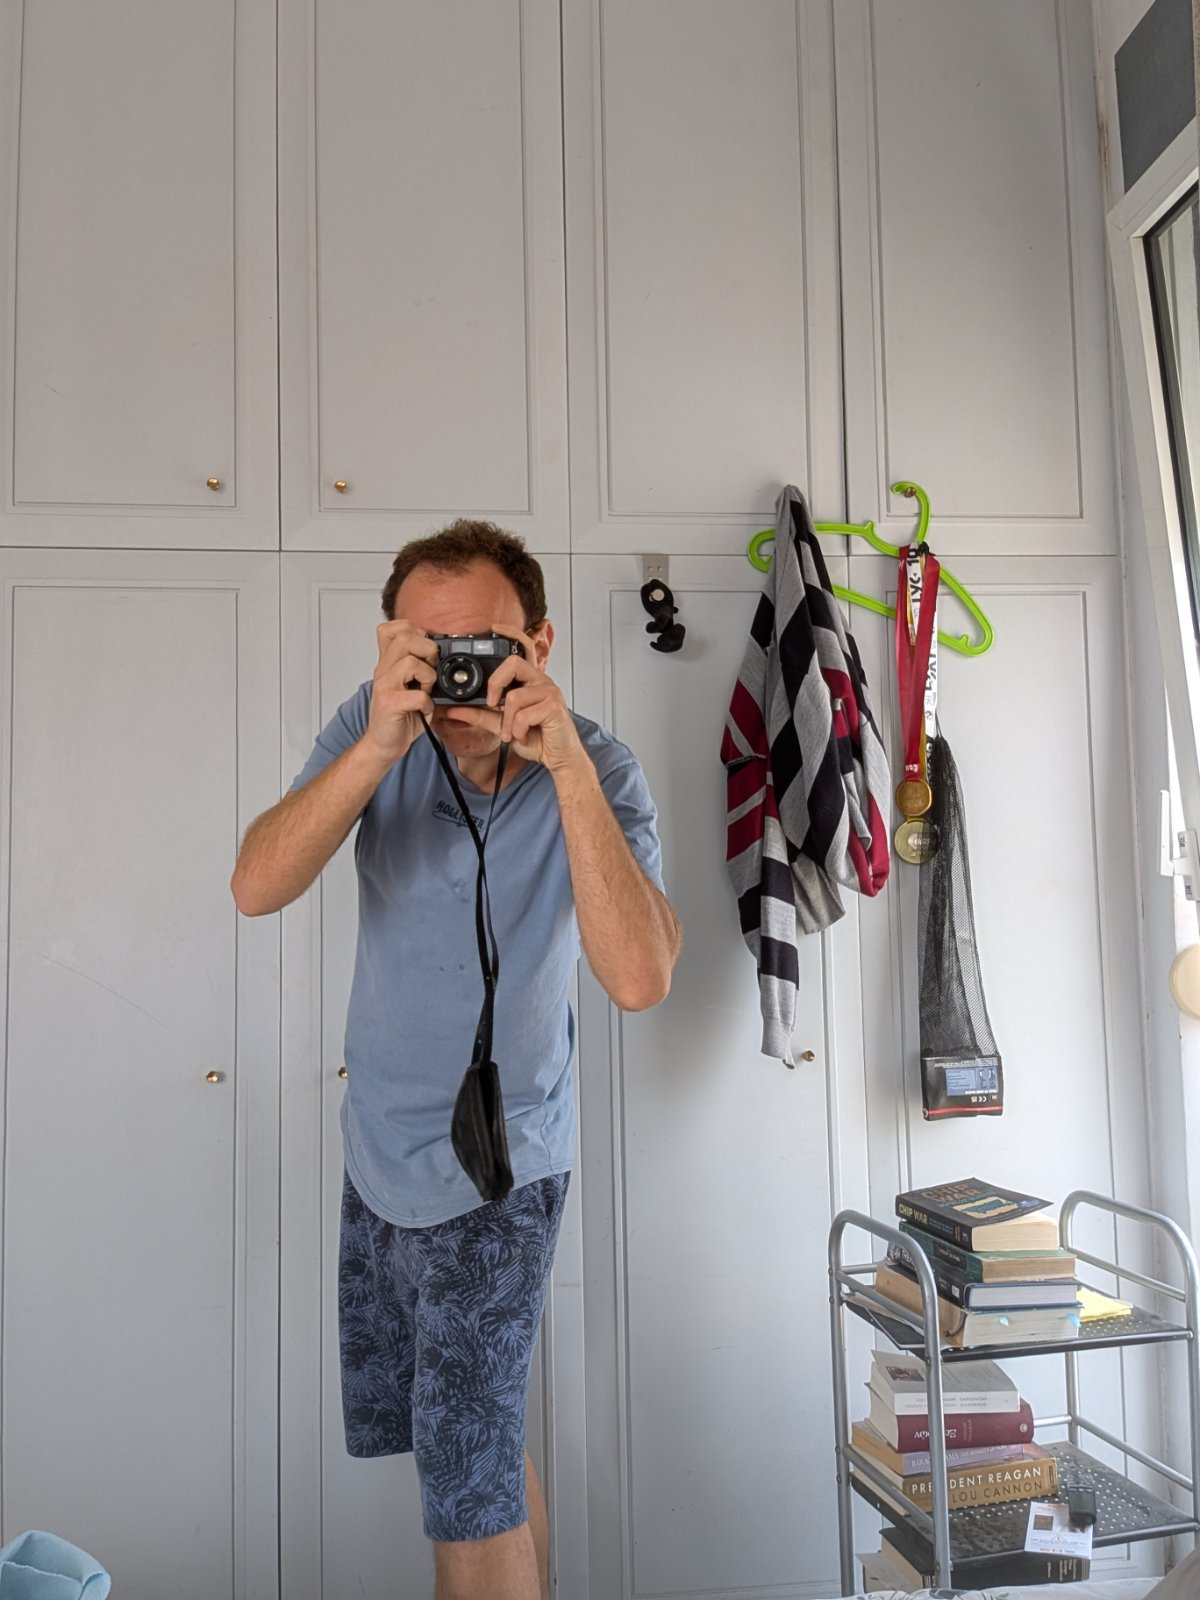

In [7]:
%cd {HOME}
Image(filename='original.jpg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [9]:
!pip install -U numpy==1.23.5

In [10]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='original.jpg', conf=0.25)


image 1/1 /content/original.jpg: 640x480 1 person, 1 tie, 1 chair, 1 cell phone, 6 books, 30.2ms
Speed: 7.4ms preprocess, 30.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)


In [11]:
results[0].boxes.xyxy

tensor([[2.2970e+02, 5.1293e+02, 6.8286e+02, 1.5958e+03],
        [4.2976e+02, 6.3346e+02, 5.1870e+02, 7.0512e+02],
        [8.9534e+02, 1.1732e+03, 1.0602e+03, 1.2514e+03],
        [8.9235e-01, 1.5288e+03, 1.1232e+02, 1.5994e+03],
        [8.4922e+02, 1.4224e+03, 1.0595e+03, 1.5078e+03],
        [7.9210e+02, 4.9965e+02, 8.8988e+02, 8.9861e+02],
        [8.5853e+02, 1.4037e+03, 1.0355e+03, 1.4525e+03],
        [8.9814e+02, 1.2138e+03, 1.0688e+03, 1.2555e+03],
        [8.6536e+02, 1.3521e+03, 1.0346e+03, 1.4566e+03],
        [8.9953e+02, 1.2292e+03, 1.0761e+03, 1.2933e+03]], device='cuda:0')

In [12]:
# Get first image's results
result = results[0]

# Get class names
names = model.names  # e.g., {0: 'person', 1: 'bicycle', ...}

# Loop through each detected object
for i in range(len(result.boxes.cls)):
    class_id = int(result.boxes.cls[i])  # class index
    class_name = names[class_id]         # readable label (e.g., 'person')

    # Get segmentation mask
    if result.masks is not None:
        mask_coords = result.masks.xy[i]  # Nx2 numpy array of polygon points
        print(f"\nObject {i+1}: {class_name}")
        print("Mask coordinates (x, y):")
        for x, y in mask_coords:
            print(f"({int(x)}, {int(y)})")
    else:
        print(f"\nObject {i+1}: {class_name} — No mask found")


Object 1: person
Mask coordinates (x, y):
(432, 515)
(432, 522)
(427, 527)
(425, 527)
(422, 530)
(420, 530)
(415, 535)
(412, 535)
(407, 540)
(405, 540)
(397, 547)
(397, 550)
(392, 555)
(392, 557)
(390, 560)
(390, 562)
(387, 565)
(387, 570)
(385, 572)
(385, 575)
(382, 577)
(382, 580)
(380, 582)
(380, 590)
(377, 592)
(377, 620)
(375, 622)
(375, 627)
(372, 630)
(372, 637)
(370, 640)
(370, 655)
(367, 657)
(367, 665)
(365, 667)
(365, 672)
(357, 680)
(357, 682)
(340, 700)
(340, 702)
(327, 715)
(327, 717)
(322, 722)
(322, 725)
(315, 732)
(315, 735)
(310, 740)
(310, 742)
(307, 745)
(307, 747)
(305, 750)
(305, 752)
(302, 755)
(302, 757)
(297, 762)
(297, 765)
(295, 767)
(295, 770)
(287, 777)
(287, 780)
(282, 785)
(282, 787)
(247, 822)
(247, 825)
(240, 832)
(240, 835)
(237, 837)
(237, 840)
(232, 845)
(225, 845)
(225, 910)
(232, 910)
(235, 912)
(237, 912)
(240, 915)
(242, 915)
(245, 917)
(262, 917)
(265, 915)
(267, 915)
(270, 912)
(275, 912)
(277, 910)
(280, 910)
(282, 907)
(285, 907)
(290, 902)


In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)

